In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Je rajoute mes modifcation
import sklearn
import seaborn as sns

In [119]:
data = pd.read_csv('concrete.csv')
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [120]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [121]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [122]:
duplicates = data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

In [123]:

duplicates.value_counts()

False    1005
True       25
Name: count, dtype: int64

In [124]:
new = data.drop_duplicates()

In [125]:
new.duplicated().value_counts()

False    1005
Name: count, dtype: int64

In [126]:
new.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

<Axes: ylabel='cement'>

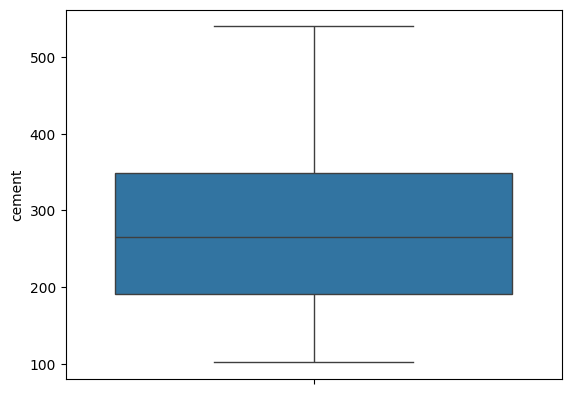

In [127]:
sns.boxplot(new['cement'])

<Axes: ylabel='superplastic'>

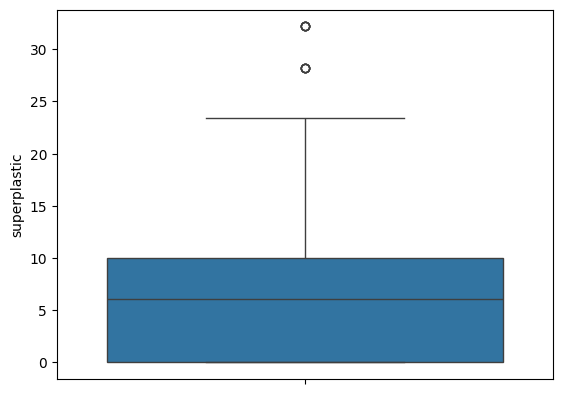

In [128]:
sns.boxplot(new['superplastic'])

In [129]:
new= new[new.superplastic <= 25]

<Axes: ylabel='superplastic'>

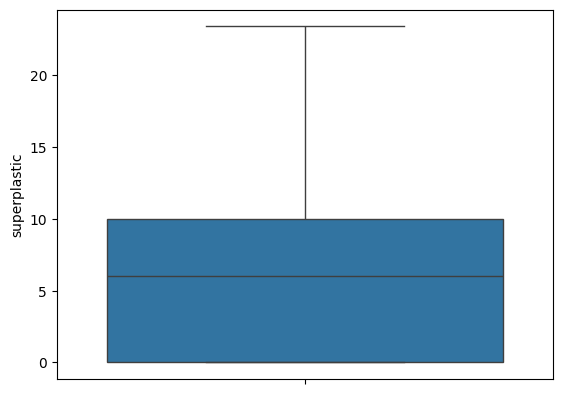

In [130]:
sns.boxplot(new['superplastic'])

<Axes: ylabel='age'>

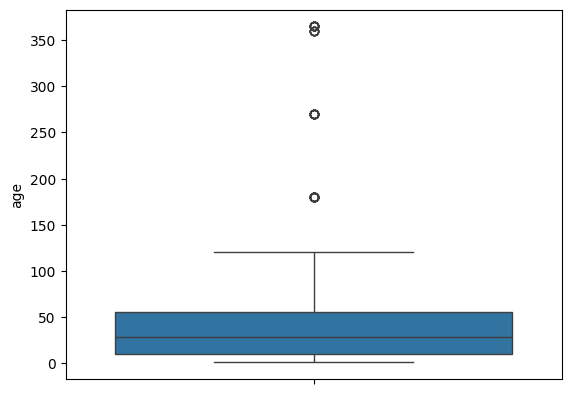

In [131]:
sns.boxplot(new['age'])

In [132]:
new= new[new.age <= 60]

<Axes: ylabel='age'>

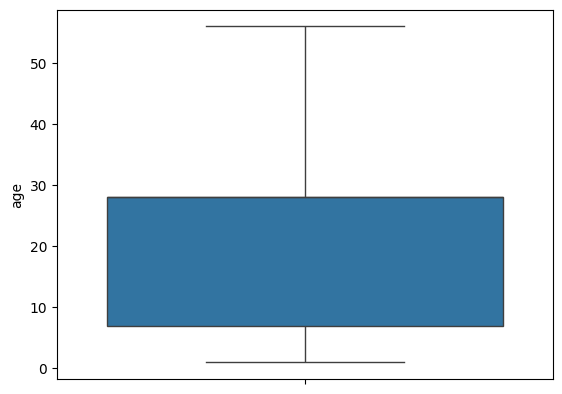

In [133]:
sns.boxplot(new['age'])

<Axes: ylabel='water'>

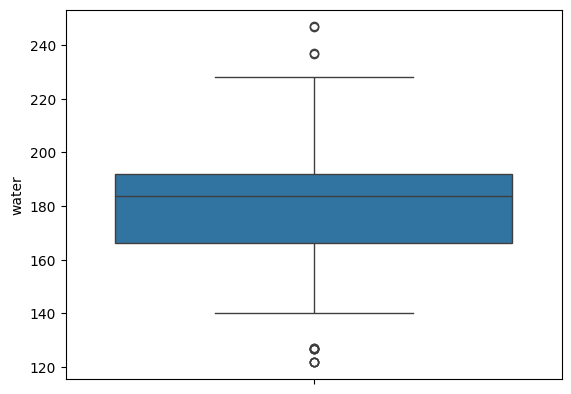

In [134]:
sns.boxplot(new['water'])

In [135]:
new= new[new.water <= 220]

In [136]:
new = new[new.water >= 140]

<Axes: ylabel='water'>

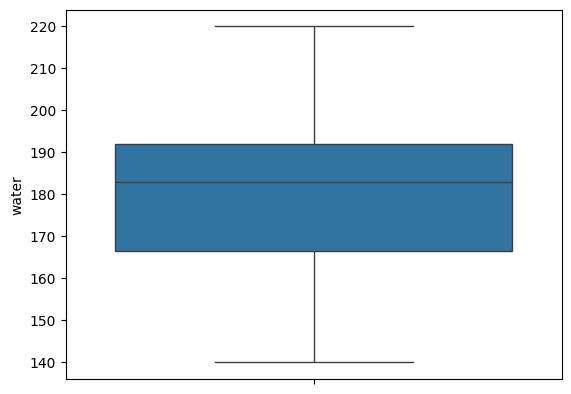

In [137]:
sns.boxplot(new['water'])

In [138]:
new.to_csv('new_concrete1.csv',index = False)

In [139]:
df = pd.read_csv('new_concrete1.csv')

In [140]:
#SPLIT X et y
X = df.drop(['strength'], axis =1)
y = df[['strength']]

In [141]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [142]:
#Transformatoion en torch tensor

X_train = torch.tensor(X_train.values, dtype= torch.float32)
X_test = torch.tensor(X_test.values, dtype= torch.float32)
y_train = torch.tensor(y_train.values, dtype= torch.float32)
y_test = torch.tensor(y_test.values, dtype= torch.float32)

In [143]:
X_train

tensor([[ 277.1000,    0.0000,   97.4000,  ...,  973.9000,  875.6000,
            3.0000],
        [ 425.0000,  106.3000,    0.0000,  ...,  852.1000,  887.1000,
            7.0000],
        [ 149.0000,  117.6000,   91.7000,  ...,  953.4000,  780.3000,
           28.0000],
        ...,
        [ 167.0000,   75.4000,  167.0000,  ..., 1007.3000,  770.1000,
           14.0000],
        [ 254.0000,    0.0000,    0.0000,  ...,  968.0000,  863.0000,
            3.0000],
        [ 166.1000,    0.0000,  163.3000,  ..., 1058.6000,  780.1000,
           28.0000]])

In [144]:
df.shape

(780, 9)

In [145]:
# #ARCHITECTURE NEURAL NETWORK AVEC Pytorch

# class LinearRegression(nn.Module):
#     def __init__(self,input_dim):
#         super(LinearRegression,self).__init__()
#         self.fc1 = nn.Linear(input_dim,10)
#         self.fc2 = nn.Linear(10,5)
#         self.fc3 = nn.Linear(5,3)
#         self.fc4 = nn.Linear(3,1)

#     def forward(self,d):
#         out = torch.relu(self.fc1(d))
#         out = torch.relu(self.fc2(out))
#         out = torch.relu(self.fc3(out))
#         out = self.fc4(out)
#         return out
# input_dim = X_train.shape[1]
# torch.manual_seed(25)
# model = LinearRegression(input_dim)

In [148]:
# since data is ready we can develop the model:

class linearRegression(nn.Module): # all the dependencies from torch will be given to this class [parent class] # nn.Module contains all the building block of neural networks:
  def __init__(self,input_dim):    #nitialisation de la classe
    super(linearRegression,self).__init__()  # building connection with parent and child classes
    self.fc1=nn.Linear(input_dim,10)          # hidden layer 1
    self.fc2=nn.Linear(10,5)                  # hidden layer 2
    self.fc3=nn.Linear(5,3)                   # hidden layer 3
    self.fc4=nn.Linear(3,1)                   # last layer

  def forward(self,d):
    out=torch.relu(self.fc1(d))              # input * weights + bias for layer 1
    out=torch.relu(self.fc2(out))            # input * weights + bias for layer 2
    out=torch.relu(self.fc3(out))            # input * weights + bias for layer 3
    out=self.fc4(out)                        # input * weights + bias for last layer
    return out                               # final outcome

input_dim=X_train.shape[1]
torch.manual_seed(42)  # to make initilized weights stable:
model=linearRegression(input_dim)

In [149]:
# optimizer et loss function
loss = nn.MSELoss()
optimizers = optim.Adam(params = model.parameters(),lr= 0.01)

In [150]:
#Training the model
num_of_epochs = 1000
for i in range(num_of_epochs):
    y_train_prediction = model(X_train)
    loss_value = loss(y_train_prediction.squeeze(),y_train) #definition loss
    optimizers.zero_grad()  #Gradient a 0 pour chaque iteration
    loss_value.backward()  #Backpropagation
    optimizers.step() #unpdate weights
    #print the loss
    if i%10 ==0:
        print(f'[epoch:{i}]:The loss value for training is {loss_value}')

d:\Environnements\ANN\envPytorch\lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([585, 1])) that is different to the input size (torch.Size([585])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[epoch:0]:The loss value for training is 1309.18408203125
[epoch:10]:The loss value for training is 1294.2203369140625
[epoch:20]:The loss value for training is 1279.553955078125
[epoch:30]:The loss value for training is 1264.4376220703125
[epoch:40]:The loss value for training is 1248.2547607421875
[epoch:50]:The loss value for training is 1230.436279296875
[epoch:60]:The loss value for training is 1210.668701171875
[epoch:70]:The loss value for training is 1188.3043212890625
[epoch:80]:The loss value for training is 1163.349853515625
[epoch:90]:The loss value for training is 1135.8760986328125
[epoch:100]:The loss value for training is 1106.0059814453125
[epoch:110]:The loss value for training is 1073.907958984375
[epoch:120]:The loss value for training is 1039.788330078125
[epoch:130]:The loss value for training is 1003.8850708007812
[epoch:140]:The loss value for training is 966.4622802734375
[epoch:150]:The loss value for training is 927.8043212890625
[epoch:160]:The loss value fo

In [153]:
#Saving the model
from pathlib import Path
filename = Path('models')
filename.mkdir(parents=True,exist_ok=True)
model_name = 'linear_Regression.pth'

#Saving
saving_path = filename/model_name
print(saving_path)
torch.save(obj=model.state_dict(),f=saving_path)

models\linear_Regression.pth


In [154]:
#loader le modele
load_model = linearRegression(input_dim)
load_model.load_state_dict(torch.load('models\linear_regression.pth'))

C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_5948\2964674071.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model.load_state_dict(torch.load('models\linear

<All keys matched successfully>

In [155]:
#appel
load_model.eval()
with torch.no_grad():
    pred = load_model(torch.tensor([[1.45,2.43,3.78,4.23,5.76,6.0,7.4,8.3]]))
    print(f'prediction value:{pred.item()}')

prediction value:32.57720947265625
